In [4]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

/home/goslim/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:1039: UserWarning: Bad val "QtAgg" on line #38
	"backend      : QtAgg
"
	in file "/home/goslim/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc"
	Key backend: Unrecognized backend string "qtagg": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))


In [5]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


### [Mission 1] 모든 속성들을 수치형 데이터로 변환

- Mushroom 데이터 집합에 대한 "Categorical Attribute를 Numerical Attribute로 변환" 강의 내용 참조
- 최종적으로 DataFrame.describe() 함수를 통하여 각 속성별로 기본 통계치를 산출

In [6]:
df[all_names[6]].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [7]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[all_names[i]].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    #print map_dic[i]    
    df[all_names[i]] = df[all_names[i]].map(map_dic[i])    
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [8]:
df.shape[1]

7

In [9]:
df    

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [10]:
for i in range(df.shape[1]):
    print df[[i]].describe()
    print

            buying
count  1728.000000
mean      1.500000
std       1.118358
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000

             maint
count  1728.000000
mean      1.500000
std       1.118358
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000

             doors
count  1728.000000
mean      1.500000
std       1.118358
min       0.000000
25%       0.750000
50%       1.500000
75%       2.250000
max       3.000000

           persons
count  1728.000000
mean      1.000000
std       0.816733
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000

          log_boot
count  1728.000000
mean      1.000000
std       0.816733
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000

            safety
count  1728.000000
mean      1.000000
std       0.816733
min       0.000000
25%       0.000000
50%       1.000000
75%    

### [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

- Mushromm 데이터 집합에 대한 "Edible Mushrooms과 Poisonous Mushrooms 의 두 개의 그룹핑 작업 및 각 그룹별 Boxplot 그리기" 강의 내용 참조

In [11]:
df_unacc = df[df[target_name]==0]
df_acc = df[df[target_name]==1]
df_vgood = df[df[target_name]==2]
df_good= df[df[target_name]==3]

/home/goslim/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


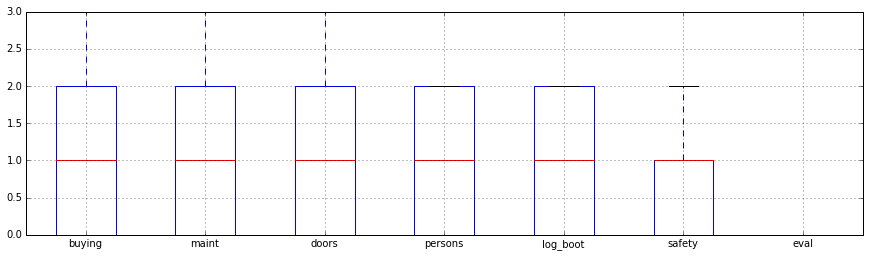

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

In [13]:
df_unacc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210
mean,1.350413,1.366942,1.454545,0.790083,0.932231,0.752893,0
std,1.118099,1.127547,1.127152,0.835859,0.819754,0.802763,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0


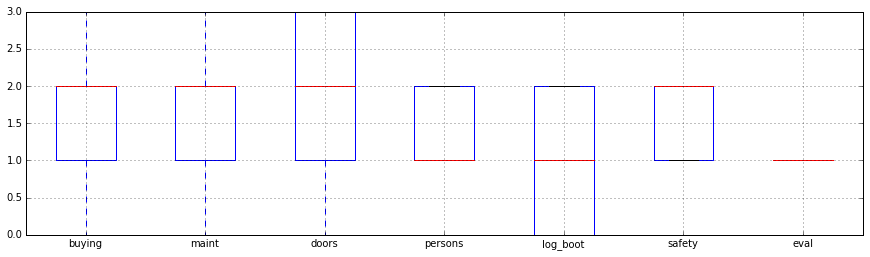

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

In [15]:
df_acc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384
mean,1.575521,1.591146,1.585938,1.484375,1.101562,1.531250,1
std,1.041953,1.048199,1.094925,0.500408,0.799868,0.499674,0
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1
50%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1
75%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1


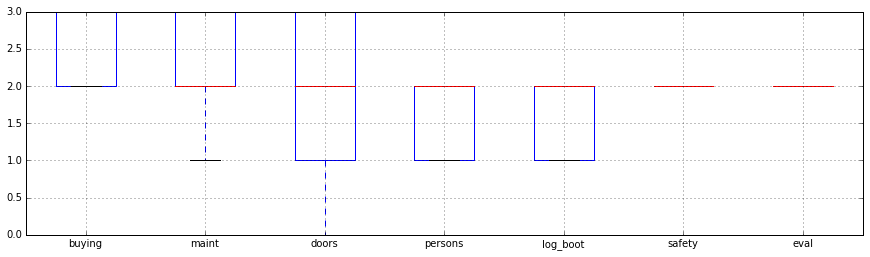

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

In [17]:
df_vgood.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,65.00000,65.000000,65.000000,65.000000,65.000000,65,65
mean,2.60000,2.200000,1.769231,1.538462,1.615385,2,2
std,0.49371,0.754155,1.057255,0.502398,0.490290,0,0
min,2.00000,1.000000,0.000000,1.000000,1.000000,2,2
25%,2.00000,2.000000,1.000000,1.000000,1.000000,2,2
50%,3.00000,2.000000,2.000000,2.000000,2.000000,2,2
75%,3.00000,3.000000,3.000000,2.000000,2.000000,2,2
max,3.00000,3.000000,3.000000,2.000000,2.000000,2,2


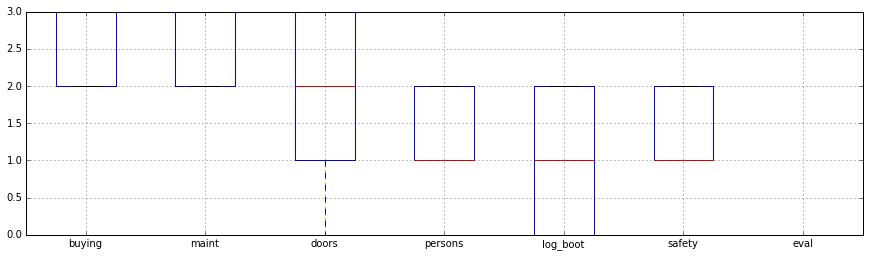

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

In [19]:
df_good.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69
mean,2.666667,2.666667,1.565217,1.478261,1.043478,1.434783,3
std,0.474858,0.474858,1.104513,0.503187,0.812309,0.499360,0
min,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3
25%,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,3
50%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3


### [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기
- Iris 데이터 집합에 대한 "탐색적 자료 분석 (Exploratory data analysis)" 강의 내용 참조
- 총 6개의 Feature가 존재하므로 두 개씩 쌍을 만든다면 총 15개의 쌍이 나옴
    - 예. (buying, maint), (buying, doors), ...
- Categorical Data를 Numerical Attribute로 변환한 DataFrame으로 작업해야 함
- 그러므로, 총 15개의 Scatter Plot을 산출해야 함
- 15개의 Scatter Plot을 눈으로 분석하여 Guess 할 수 있는 분석 내용을 작성

In [20]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [23]:
eval_names=('unacc','acc','vgood','good')
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0] ,
        'label_y': feature_names[1] ,
        'ylim_min': 1.5,
        'ylim_max': 5.0
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0] ,
        'label_y': feature_names[2] ,
        'ylim_min': 0.0,
        'ylim_max': 9.0
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0] ,
        'label_y': feature_names[3] ,
        'ylim_min': -0.5,
        'ylim_max': 3.5
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0] ,
        'label_y': feature_names[4] ,
        'ylim_min': 0.0,
        'ylim_max': 9.0
    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0] ,
        'label_y': feature_names[5] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    5: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1] ,
        'label_y': feature_names[2] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    6: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1] ,
        'label_y': feature_names[3] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    7: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1] ,
        'label_y': feature_names[4] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    8: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1] ,
        'label_y': feature_names[5] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    9: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2] ,
        'label_y': feature_names[3] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    10: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2] ,
        'label_y': feature_names[4] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    11: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[2] ,
        'label_y': feature_names[5] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    12: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3] ,
        'label_y': feature_names[4] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    13: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3] ,
        'label_y': feature_names[5] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    },
    14: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4] ,
        'label_y': feature_names[5] ,
        'ylim_min': 0.0,
        'ylim_max': 3.5
    }
    
    
}

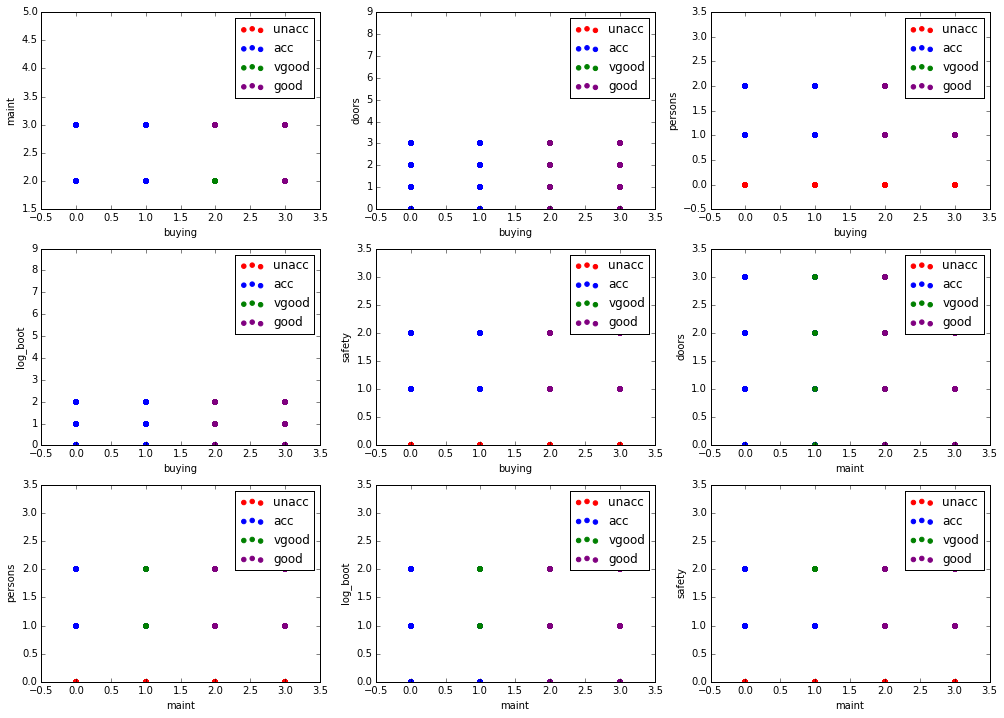

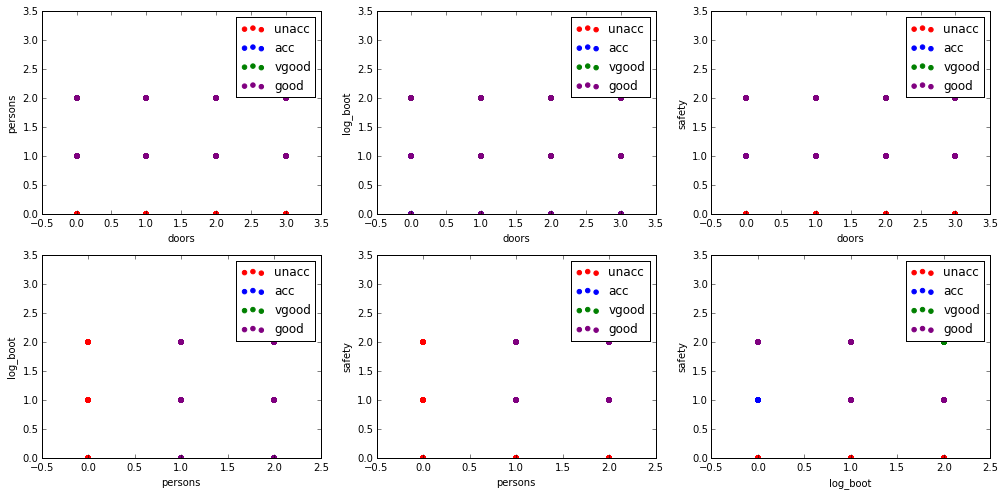

In [24]:
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,9):
    ax.append(fig.add_subplot(330 + (i+1)))
    
    un = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color='red')
    ac = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    vg = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='green')
    go = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='purple')
    
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((un,ac,vg,go), eval_names)
fig2 = plt.figure(figsize=(17, 8))

for i in range(0,6):
    ax.append(fig2.add_subplot(230 + ((i)+1)))
    
for i in range(9, 15):
    un = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color='red')
    ac = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    vg = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='green')
    go = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='purple')
    
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((un,ac,vg,go), eval_names)

#### 분석 내용

가격이 낮은경우 대게 만족하는 경우 성향이 뚜렷하다.

유지보수에는 가격보다는 안정성 혹은 서비스의 질이 우선인것같다.

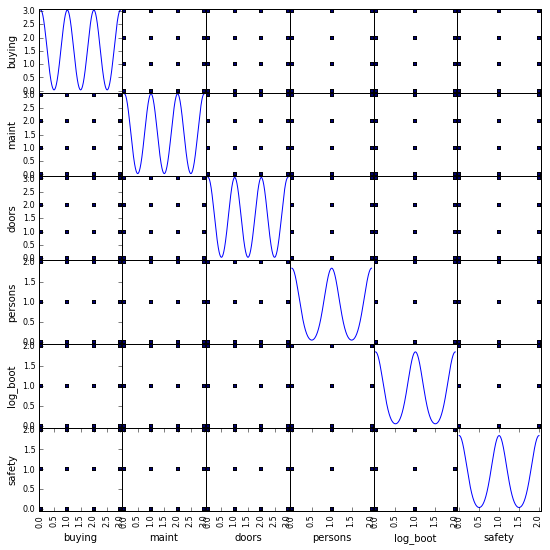

In [25]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df.ix[:, 0:6], figsize=(9, 9), diagonal='kde')

### [Mission 4] 전체 데이터 집합에 대한 Entropy 산출
- Binary Target 이 아닌 4개의 Target 이 존재함을 유의해야 함

In [26]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [31]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [32]:
df_per_attr = {}
for i in range(0,6):
    df_per_attr[i] = {}
    groupby_df = df[[6, i]].groupby(feature_names[i])
    df_per_attr[i]['ngorups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [33]:
from collections import Counter
from math import log

labels = df['eval'].values
n_labels = len(labels)
print n_labels
print

counts = np.array(Counter(labels).values())
print counts
print

probs = counts / float(n_labels)
print probs
print

n_classes = np.count_nonzero(probs)
print n_classes
print

ent = 0.

for i in probs:
    ent -= i * log(i, n_classes)

print ent

1728

[1210  384   65   69]

[ 0.70023148  0.22222222  0.03761574  0.03993056]

4

0.602870485006


In [34]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [35]:
df['eval'].values

array([0, 0, 0, ..., 0, 3, 2])

In [36]:
entropy(df['eval'].values)

0.60287048500608764

In [37]:
df_per_attr[1]['subgroups'][0].values

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [38]:
entropy(df['eval'].values)

0.60287048500608764

### [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출
- 해당 속성을 잘 기억하고 Mission 6에서의 결과와 동일한지 확인해야 함

In [39]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[all_names[i]].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    #print map_dic[i]    
    df[all_names[i]] = df[all_names[i]].map(map_dic[i])    
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [40]:
parent_size = float(len(df))
parent_size

1728.0

In [42]:
for i in range(0, 6):
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngorups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

0
0.25 * 0.6500 = 0.1625
0.25 * 0.8113 = 0.2028
0.25 * 0.7024 = 0.1756
0.25 * 0.7855 = 0.1964
Information Gain: 0.6029 - 0.7373 = -0.1344

1
0.25 * 0.6500 = 0.1625
0.25 * 0.6200 = 0.1550
0.25 * 0.7024 = 0.1756
0.25 * 0.7453 = 0.1863
Information Gain: 0.6029 - 0.6794 = -0.0766

2
0.25 * 0.5267 = 0.1317
0.25 * 0.6059 = 0.1515
0.25 * 0.6350 = 0.1587
0.25 * 0.6350 = 0.1587
Information Gain: 0.6029 - 0.6006 = 0.0022

3
0.33 * 0.0000 = 0.0000
0.33 * 0.7404 = 0.2468
0.33 * 0.7388 = 0.2463
Information Gain: 0.6029 - 0.4930 = 0.1098

4
0.33 * 0.5679 = 0.1893
0.33 * 0.6280 = 0.2093
0.33 * 0.6856 = 0.2285
Information Gain: 0.6029 - 0.6271 = -0.0243

5
0.33 * 0.0000 = 0.0000
0.33 * 0.7667 = 0.2556
0.33 * 0.8078 = 0.2693
Information Gain: 0.6029 - 0.5248 = 0.0781



In [44]:
import operator
information_gain_dict = {}
for i in range(0, 6):
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

{0: -0.13443808367862886,
 1: -0.076564919618021809,
 2: 0.002242858313316054,
 3: 0.1098314816699541,
 4: -0.024277948325873711,
 5: 0.078058732848778067}

In [45]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))

(3, 0.1098314816699541)

### [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도
- 루트노드에서 첫번째 Branch를 구성할 때 활용한 속성이 Mission 5에서 산출한 것과 동일한지 파악
    - 해당 속성에 대하여 sklearn 모듈 내에서 어떠한 방법으로 기준을 정했는지 판단 및 해석
- 모델 구축 후 기존 Training Data중 일부에 대한 예측
- 기존 Training Data에 존재하지 않는 새로운 데이터에 대한 예측

In [47]:
from sklearn import tree

In [48]:
attributes = df.iloc[:, 0:6]
attributes

,buying,maint,doors,persons,log_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
5,0,0,0,0,1,2
6,0,0,0,0,2,0
7,0,0,0,0,2,1
8,0,0,0,0,2,2
9,0,0,0,1,0,0


In [49]:
car_data = attributes.values
car_data

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       ..., 
       [3, 3, 3, 2, 2, 0],
       [3, 3, 3, 2, 2, 1],
       [3, 3, 3, 2, 2, 2]])

In [50]:
target_series = df.iloc[:, 6]
target_series

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1698    0
1699    3
1700    2
1701    0
1702    0
1703    0
1704    0
1705    0
1706    0
1707    0
1708    0
1709    0
1710    0
1711    1
1712    3
1713    0
1714    3
1715    2
1716    0
1717    3
1718    2
1719    0
1720    1
1721    3
1722    0
1723    3
1724    2
1725    0
1726    3
1727    2
Name: eval, dtype: int64

In [51]:
car_target = target_series.values
car_target

array([0, 0, 0, ..., 0, 3, 2])

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(car_data, car_target)

In [54]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

<img src="https://raw.githubusercontent.com/goslim12/data_science/master/car.png" />